# Feature Engineering

 ## World 1- Magma Peak

This step involves the following:

>1.[Import and Read data](#Import-and-Read-data)<br>
>2.[Calculating Number of Session](#Calculating-Number-of-Session)<br>
>3.[Calculating Game time of Session](#Calculating-Game-time-of-Session)<br>
>4.[Calculating Game time per Session](#Calculating-Game-time-per-Session)<br>
>5.[Removing Outliers](#Removing-Outliers)<br>


## Import and Read data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_colwidth', -1) 


In [3]:
df=pd.read_csv('../data/magmapeak.csv')
score=pd.read_csv('../data/magmapeak_score.csv')

In [4]:
print(df.shape)
print(score.shape)

(3208242, 11)
(4055, 7)


In [5]:
df.head()

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
0,27253bdc,4b57c9a59474a1b9,2019-08-06T04:57:45.301Z,"{""event_code"": 2000, ""event_count"": 1}",0006a69f,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK
1,77261ab5,2b9d5af79bcdb79f,2019-08-06T04:58:14.538Z,"{""version"":""1.0"",""event_count"":1,""game_time"":0,""event_code"":2000}",0006a69f,1,2000,0,Sandcastle Builder (Activity),Activity,MAGMAPEAK
2,b2dba42b,2b9d5af79bcdb79f,2019-08-06T04:58:14.615Z,"{""description"":""Let's build a sandcastle! First, fill up your mold with sand! You can use the shovel here. The mold gives the sand its shape!"",""identifier"":""Dot_LetsSandcastle,Dot_FillMold,Dot_MoldShape"",""media_type"":""audio"",""total_duration"":6758,""event_count"":2,""game_time"":29,""event_code"":3010}",0006a69f,2,3010,29,Sandcastle Builder (Activity),Activity,MAGMAPEAK
3,1325467d,2b9d5af79bcdb79f,2019-08-06T04:58:16.680Z,"{""coordinates"":{""x"":273,""y"":650,""stage_width"":1015,""stage_height"":762},""event_count"":3,""game_time"":2137,""event_code"":4070}",0006a69f,3,4070,2137,Sandcastle Builder (Activity),Activity,MAGMAPEAK
4,1325467d,2b9d5af79bcdb79f,2019-08-06T04:58:18.474Z,"{""coordinates"":{""x"":863,""y"":237,""stage_width"":1015,""stage_height"":762},""event_count"":4,""game_time"":3937,""event_code"":4070}",0006a69f,4,4070,3937,Sandcastle Builder (Activity),Activity,MAGMAPEAK


In [6]:
score.head()

,game_session,installation_id,title,num_correct,num_incorrect,accuracy,accuracy_group
0,197a373a77101924,0006c192,Cauldron Filler (Assessment),1,0,1.0,3
1,470a1bd6b99152a7,002db7e3,Cauldron Filler (Assessment),1,0,1.0,3
2,272cc78535e9add1,003372b0,Cauldron Filler (Assessment),1,0,1.0,3
3,3a50778205e34531,004c2091,Cauldron Filler (Assessment),1,0,1.0,3
4,ae5de691ea2252f1,004c2091,Cauldron Filler (Assessment),1,0,1.0,3


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3208242 entries, 0 to 3208241
Data columns (total 11 columns):
event_id           object
game_session       object
timestamp          object
event_data         object
installation_id    object
event_count        int64
event_code         int64
game_time          int64
title              object
type               object
world              object
dtypes: int64(3), object(8)
memory usage: 269.2+ MB


In [8]:
score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4055 entries, 0 to 4054
Data columns (total 7 columns):
game_session       4055 non-null object
installation_id    4055 non-null object
title              4055 non-null object
num_correct        4055 non-null int64
num_incorrect      4055 non-null int64
accuracy           4055 non-null float64
accuracy_group     4055 non-null int64
dtypes: float64(1), int64(3), object(3)
memory usage: 221.9+ KB


In [9]:
df.isnull().sum()

event_id           0
game_session       0
timestamp          0
event_data         0
installation_id    0
event_count        0
event_code         0
game_time          0
title              0
type               0
world              0
dtype: int64

In [10]:
score.isnull().sum()

game_session       0
installation_id    0
title              0
num_correct        0
num_incorrect      0
accuracy           0
accuracy_group     0
dtype: int64

In [11]:
#converting the timestamp column into timestamp format
df['timestamp']=pd.to_datetime(df['timestamp'])

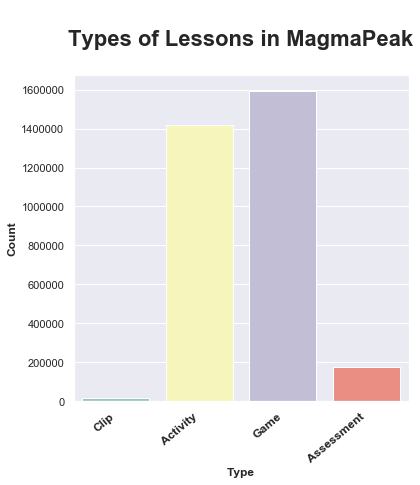

In [12]:
# types of lessons in this world
sns.set(style="darkgrid")
plt.figure(figsize=(6,6))
ax=sns.countplot(df['type'],palette="Set3")
plt.title('\nTypes of Lessons in MagmaPeak\n',
         fontdict= {
        'weight' : 'bold',
        'size'   : 22});
plt.xlabel('Type',fontdict= {
        'weight' : 'bold',
        'size'   : 12})
plt.ylabel('Count',fontdict= {
        'weight' : 'bold',
        'size'   : 12});# number of gane sessions in this dataframe
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right",fontdict= {
        'weight' : 'bold',
        'size'   : 12});

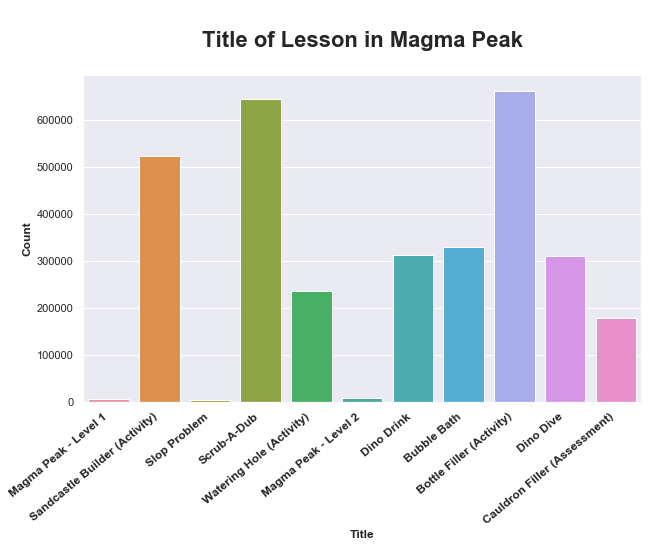

In [13]:
#title of each lesson in this world
sns.set(style="darkgrid")
plt.figure(figsize=(10,6))
plt.title('\nTitle of Lesson in Magma Peak\n',
         fontdict= {
        'weight' : 'bold',
        'size'   : 22})
ax=sns.countplot(df['title'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right",fontdict= {
        'weight' : 'bold',
        'size'   : 12});
plt.xlabel('Title',fontdict= {
        'weight' : 'bold',
        'size'   : 12})
plt.ylabel('Count',fontdict= {
        'weight' : 'bold',
        'size'   : 12}); # number of sessions played by user


In [14]:
df['title'].unique()

array(['Magma Peak - Level 1', 'Sandcastle Builder (Activity)',
       'Slop Problem', 'Scrub-A-Dub', 'Watering Hole (Activity)',
       'Magma Peak - Level 2', 'Dino Drink', 'Bubble Bath',
       'Bottle Filler (Activity)', 'Dino Dive',
       'Cauldron Filler (Assessment)'], dtype=object)

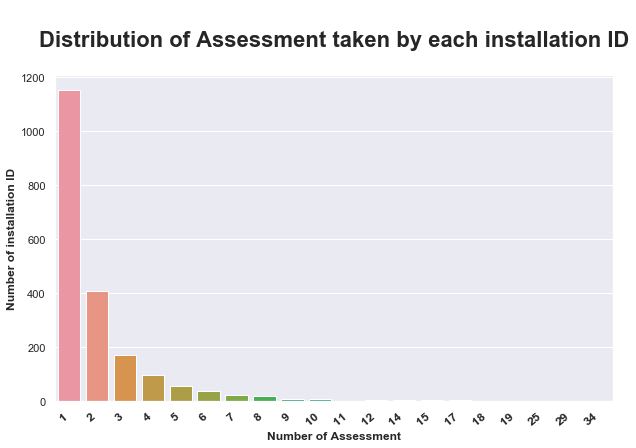

In [15]:
sns.set(style="darkgrid")
plt.figure(figsize=(10,6))

ax=sns.countplot(score.groupby('installation_id').game_session.nunique().sort_values());
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right",fontdict= {
        'weight' : 'bold',
        'size'   : 12});
plt.title('\nDistribution of Assessment taken by each installation ID\n',
          fontdict= {
        'weight' : 'bold',
        'size'   : 22})
plt.xlabel('Number of Assessment',fontdict= {
        'weight' : 'bold',
        'size'   : 12})
plt.ylabel('Number of installation ID',fontdict= {
        'weight' : 'bold',
        'size'   : 12});


In [16]:
#number of unique installation_id in df
df['installation_id'].nunique()

3153

In [17]:
# removing the installation_id in df which do not have accuracy group(grades) in score-dataframe
id=score['installation_id'].unique()
df=df[df.installation_id.isin(id)]
df.shape

(2596548, 11)

In [18]:
#number of unique installation_id in df after removing id without accuracy group
# is equal to number of unique installation id in score
print(df['installation_id'].nunique())
print(score['installation_id'].nunique())

1985
1985


In [19]:
score.shape

(4055, 7)

## Calculating Number of Session

***Number of times each user has played a lesson before taking first Assessment***

In [20]:
# A user can take assessment multiple times.
#Score dataframe gives Accuracy_group (grades) only for few of the assessments
# Assessment without accuracy_group will not be useful for modelling
#Hence creating a new dataframe which has game_sessions specified in score dataframe
gs=score['game_session'].unique()
time=df[df.game_session.isin(gs)]
time.shape

(172857, 11)

In [21]:
# creating a new dataframe with installation_id,game_session of asssessment, maximum timestamp of assessment in df  
ts_gs=time.groupby(['installation_id','game_session']).timestamp.max()
ts_gs=pd.DataFrame(ts_gs)
ts_gs.head()

timestamp
installation_id game_session                                     
0006c192        197a373a77101924 2019-09-14 15:35:56.194000+00:00
002db7e3        470a1bd6b99152a7 2019-08-08 21:48:37.434000+00:00
003372b0        272cc78535e9add1 2019-09-27 13:14:56.453000+00:00
004c2091        3a50778205e34531 2019-08-05 23:30:36.098000+00:00
                ae5de691ea2252f1 2019-08-06 22:44:47.194000+00:00

In [22]:
#reset index 
ts_gs.reset_index(inplace=True)
ts_gs.rename(columns={'timestamp': 'ts'}, inplace=True) #renaming the timestamp column into ts
print(ts_gs.shape)
ts_gs.head()

(4055, 3)


,installation_id,game_session,ts
0,0006c192,197a373a77101924,2019-09-14 15:35:56.194000+00:00
1,002db7e3,470a1bd6b99152a7,2019-08-08 21:48:37.434000+00:00
2,003372b0,272cc78535e9add1,2019-09-27 13:14:56.453000+00:00
3,004c2091,3a50778205e34531,2019-08-05 23:30:36.098000+00:00
4,004c2091,ae5de691ea2252f1,2019-08-06 22:44:47.194000+00:00


In [23]:
# retaining only one game_session per installation_id
# considering only the first assessment taken by installation_id
# timestamp (.min) will give the first assessment taken by user
ts=ts_gs.groupby('installation_id').ts.min()
ts=pd.DataFrame(ts)
ts.reset_index(inplace=True)

In [24]:
print(ts.shape)
ts.head()

(1985, 2)


,installation_id,ts
0,0006c192,2019-09-14 15:35:56.194000+00:00
1,002db7e3,2019-08-08 21:48:37.434000+00:00
2,003372b0,2019-09-27 13:14:56.453000+00:00
3,004c2091,2019-08-05 23:30:36.098000+00:00
4,00634433,2019-10-09 20:37:30.832000+00:00


In [25]:
#score_ts - ts and game_session of first assessment taken by installation_id
score_ts=ts.merge(ts_gs) #merging the ts and ts_gs 
print(score_ts.shape)
score_ts.head(2)

(1985, 3)


,installation_id,ts,game_session
0,0006c192,2019-09-14 15:35:56.194000+00:00,197a373a77101924
1,002db7e3,2019-08-08 21:48:37.434000+00:00,470a1bd6b99152a7


In [26]:
#final score dataframe-which has all the information about first assessment taken by each installation_id
final_score=pd.merge(score,score_ts)
print(final_score.shape)
final_score.head(2)

(1985, 8)


,game_session,installation_id,title,num_correct,num_incorrect,accuracy,accuracy_group,ts
0,197a373a77101924,0006c192,Cauldron Filler (Assessment),1,0,1.0,3,2019-09-14 15:35:56.194000+00:00
1,470a1bd6b99152a7,002db7e3,Cauldron Filler (Assessment),1,0,1.0,3,2019-08-08 21:48:37.434000+00:00


In [27]:
#the number of rows is equal to unique installation_id (one row per installation_id)
final_score['installation_id'].nunique()

1985

In [28]:
# dropping the column -title (as its value is  same for all the rows) and 
# game_session and ts,which is not needed anymore
final_score.drop(columns=['title','game_session','ts'],inplace=True)
final_score.head()

,installation_id,num_correct,num_incorrect,accuracy,accuracy_group
0,0006c192,1,0,1.0,3
1,002db7e3,1,0,1.0,3
2,003372b0,1,0,1.0,3
3,004c2091,1,0,1.0,3
4,00634433,1,0,1.0,3


In [29]:
# merging timestamp dataframe with first assessment to original df dataframe
final=pd.merge(df,ts) #merging df and ts dataframe
print(final.shape)
final.head()

(2596548, 12)


,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world,ts
0,27253bdc,64c2cbd03258ac95,2019-09-13 00:32:58.525000+00:00,"{""event_code"": 2000, ""event_count"": 1}",0006c192,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK,2019-09-14 15:35:56.194000+00:00
1,77261ab5,cf71181baaeaabde,2019-09-13 00:33:28.361000+00:00,"{""version"":""1.0"",""event_count"":1,""game_time"":0,""event_code"":2000}",0006c192,1,2000,0,Sandcastle Builder (Activity),Activity,MAGMAPEAK,2019-09-14 15:35:56.194000+00:00
2,b2dba42b,cf71181baaeaabde,2019-09-13 00:33:28.464000+00:00,"{""description"":""Let's build a sandcastle! First, fill up your mold with sand! You can use the shovel here. The mold gives the sand its shape!"",""identifier"":""Dot_LetsSandcastle,Dot_FillMold,Dot_MoldShape"",""media_type"":""audio"",""total_duration"":6758,""event_count"":2,""game_time"":99,""event_code"":3010}",0006c192,2,3010,99,Sandcastle Builder (Activity),Activity,MAGMAPEAK,2019-09-14 15:35:56.194000+00:00
3,1325467d,cf71181baaeaabde,2019-09-13 00:33:30.239000+00:00,"{""coordinates"":{""x"":895,""y"":438,""stage_width"":1015,""stage_height"":762},""event_count"":3,""game_time"":1902,""event_code"":4070}",0006c192,3,4070,1902,Sandcastle Builder (Activity),Activity,MAGMAPEAK,2019-09-14 15:35:56.194000+00:00
4,1325467d,cf71181baaeaabde,2019-09-13 00:33:30.727000+00:00,"{""coordinates"":{""x"":835,""y"":669,""stage_width"":1015,""stage_height"":762},""event_count"":4,""game_time"":2419,""event_code"":4070}",0006c192,4,4070,2419,Sandcastle Builder (Activity),Activity,MAGMAPEAK,2019-09-14 15:35:56.194000+00:00


In [30]:
#retaining only the lesson done before the first assessment
final=final[final['timestamp']<=final['ts']]

In [31]:
# creating a new dataframe by grouping installation_id and title 
#to get the count of number of sessions played by each user
final_df=final.groupby(['installation_id','title']).game_session.nunique().unstack()
final_df=pd.DataFrame(final_df)
print(final_df.shape)
final_df.head()

(1985, 11)


title,Bottle Filler (Activity),Bubble Bath,Cauldron Filler (Assessment),Dino Dive,Dino Drink,Magma Peak - Level 1,Magma Peak - Level 2,Sandcastle Builder (Activity),Scrub-A-Dub,Slop Problem,Watering Hole (Activity)
installation_id,,,,,,,,,,,
0006c192,1.0,1.0,1.0,1.0,NaN,2.0,2.0,3.0,1.0,NaN,1.0
002db7e3,3.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,1.0,NaN,1.0
003372b0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0
004c2091,3.0,NaN,2.0,NaN,NaN,1.0,2.0,NaN,NaN,NaN,1.0
00634433,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN


In [32]:
#reset index
final_df=final_df.reset_index()
final_df.head(1)

title,installation_id,Bottle Filler (Activity),Bubble Bath,Cauldron Filler (Assessment),Dino Dive,Dino Drink,Magma Peak - Level 1,Magma Peak - Level 2,Sandcastle Builder (Activity),Scrub-A-Dub,Slop Problem,Watering Hole (Activity)
0,0006c192,1.0,1.0,1.0,1.0,NaN,2.0,2.0,3.0,1.0,NaN,1.0


In [33]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1985 entries, 0 to 1984
Data columns (total 12 columns):
installation_id                  1985 non-null object
Bottle Filler (Activity)         1339 non-null float64
Bubble Bath                      936 non-null float64
Cauldron Filler (Assessment)     1985 non-null float64
Dino Dive                        1077 non-null float64
Dino Drink                       1026 non-null float64
Magma Peak - Level 1             1458 non-null float64
Magma Peak - Level 2             1659 non-null float64
Sandcastle Builder (Activity)    1300 non-null float64
Scrub-A-Dub                      986 non-null float64
Slop Problem                     820 non-null float64
Watering Hole (Activity)         1049 non-null float64
dtypes: float64(11), object(1)
memory usage: 186.2+ KB


In [34]:
# filling all na with 0, because the user has not attempted the lesson
final_df.fillna(0, inplace=True)


In [35]:
#converting the float columns into integer
numerical_columns=[col for col in final_df.columns if final_df[col].dtype != 'O']
for x in numerical_columns:
    final_df[x]=final_df[x].astype(int)
final_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1985 entries, 0 to 1984
Data columns (total 12 columns):
installation_id                  1985 non-null object
Bottle Filler (Activity)         1985 non-null int64
Bubble Bath                      1985 non-null int64
Cauldron Filler (Assessment)     1985 non-null int64
Dino Dive                        1985 non-null int64
Dino Drink                       1985 non-null int64
Magma Peak - Level 1             1985 non-null int64
Magma Peak - Level 2             1985 non-null int64
Sandcastle Builder (Activity)    1985 non-null int64
Scrub-A-Dub                      1985 non-null int64
Slop Problem                     1985 non-null int64
Watering Hole (Activity)         1985 non-null int64
dtypes: int64(11), object(1)
memory usage: 186.2+ KB


In [36]:
# dropping the column -Cauldron Filler (Assessment) which gives the count of number of assessment taken by user,
# as only the first assessment is considered
final_df.drop(columns=['Cauldron Filler (Assessment)'],inplace=True)


In [37]:
final_df.head()

title,installation_id,Bottle Filler (Activity),Bubble Bath,Dino Dive,Dino Drink,Magma Peak - Level 1,Magma Peak - Level 2,Sandcastle Builder (Activity),Scrub-A-Dub,Slop Problem,Watering Hole (Activity)
0,0006c192,1,1,1,0,2,2,3,1,0,1
1,002db7e3,3,1,1,1,2,3,3,1,0,1
2,003372b0,1,1,1,1,1,1,1,1,0,1
3,004c2091,3,0,0,0,1,2,0,0,0,1
4,00634433,0,0,0,0,1,1,0,0,0,0


## Calculating Game time of Session

***Time for each lesson per user, before taking first Assessment***

In [38]:
#calculating the game time for each title
final_gt=final.groupby(['installation_id','game_session','title']).game_time.max().unstack()
final_gt=pd.DataFrame(final_gt)
print(final_gt.shape)

(19414, 11)


In [39]:
final_gt.head()

title                             Bottle Filler (Activity)  Bubble Bath  \
installation_id game_session                                              
0006c192        197a373a77101924 NaN                       NaN            
                1c691f67ef07d047 NaN                       NaN            
                2db0bef8a38a7dcb NaN                        96656.0       
                61799844aa7bf841 NaN                       NaN            
                64c2cbd03258ac95 NaN                       NaN            

title                             Cauldron Filler (Assessment)  Dino Dive  \
installation_id game_session                                                
0006c192        197a373a77101924  14469.0                      NaN          
                1c691f67ef07d047 NaN                           NaN          
                2db0bef8a38a7dcb NaN                           NaN          
                61799844aa7bf841 NaN                           NaN          
                64c2cbd03258ac95 NaN                           NaN          

title                             Dino Drink  Magma Peak - Level 1  \
installation_id game_session                                         
0006c192        197a373a77101924 NaN         NaN                     
                1c691f67ef07d047 NaN         NaN                     
                2db0bef8a38a7dcb NaN         NaN                     
                61799844aa7bf841 NaN         NaN                     
                64c2cbd03258ac95 NaN          0.0                    

title                             Magma Peak - Level 2  \
installation_id game_session                             
0006c192        197a373a77101924 NaN                     
                1c691f67ef07d047 NaN                     
                2db0bef8a38a7dcb NaN                     
                61799844aa7bf841  0.0                    
                64c2cbd03258ac95 NaN                     

title                             Sandcastle Builder (Activity)  Scrub-A-Dub  \
installation_id game_session                                                   
0006c192        197a373a77101924 NaN                            NaN            
                1c691f67ef07d047 NaN                             162878.0      
                2db0bef8a38a7dcb NaN                            NaN            
                61799844aa7bf841 NaN                            NaN            
                64c2cbd03258ac95 NaN                            NaN            

title                             Slop Problem  Watering Hole (Activity)  
installation_id game_session                                              
0006c192        197a373a77101924 NaN           NaN                        
                1c691f67ef07d047 NaN           NaN                        
                2db0bef8a38a7dcb NaN           NaN                        
                61799844aa7bf841 NaN           NaN                        
                64c2cbd03258ac95 NaN           NaN

In [40]:
# filling all na with 0, because the user has not attempted the lesson
final_gt.fillna(0, inplace=True)

In [41]:
#reset index
final_gt=final_gt.reset_index()
final_gt.head()

title,installation_id,game_session,Bottle Filler (Activity),Bubble Bath,Cauldron Filler (Assessment),Dino Dive,Dino Drink,Magma Peak - Level 1,Magma Peak - Level 2,Sandcastle Builder (Activity),Scrub-A-Dub,Slop Problem,Watering Hole (Activity)
0,0006c192,197a373a77101924,0.0,0.0,14469.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0006c192,1c691f67ef07d047,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,162878.0,0.0,0.0
2,0006c192,2db0bef8a38a7dcb,0.0,96656.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0006c192,61799844aa7bf841,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0006c192,64c2cbd03258ac95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
#calculating the total gametime
final_gt=final_gt.groupby(['installation_id'])['Bottle Filler (Activity)', 'Bubble Bath',
       'Cauldron Filler (Assessment)', 'Dino Dive', 'Dino Drink',
       'Magma Peak - Level 1', 'Magma Peak - Level 2',
       'Sandcastle Builder (Activity)', 'Scrub-A-Dub', 'Slop Problem',
       'Watering Hole (Activity)'].sum()

In [43]:
final_gt=final_gt.reset_index()

In [44]:
final_gt.head()

title,installation_id,Bottle Filler (Activity),Bubble Bath,Cauldron Filler (Assessment),Dino Dive,Dino Drink,Magma Peak - Level 1,Magma Peak - Level 2,Sandcastle Builder (Activity),Scrub-A-Dub,Slop Problem,Watering Hole (Activity)
0,0006c192,395901.0,96656.0,14469.0,151986.0,0.0,0.0,0.0,339403.0,162878.0,0.0,21389.0
1,002db7e3,1483253.0,259079.0,34333.0,241906.0,209658.0,0.0,0.0,129099.0,150522.0,0.0,94443.0
2,003372b0,147322.0,156537.0,35975.0,155946.0,198487.0,0.0,0.0,73131.0,29144.0,0.0,4247.0
3,004c2091,215135.0,0.0,18188.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7339.0
4,00634433,0.0,0.0,67670.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
final_gt[final_gt['Magma Peak - Level 1']>0]

title,installation_id,Bottle Filler (Activity),Bubble Bath,Cauldron Filler (Assessment),Dino Dive,Dino Drink,Magma Peak - Level 1,Magma Peak - Level 2,Sandcastle Builder (Activity),Scrub-A-Dub,Slop Problem,Watering Hole (Activity)


In [46]:
final_gt[final_gt['Magma Peak - Level 2']>0]

title,installation_id,Bottle Filler (Activity),Bubble Bath,Cauldron Filler (Assessment),Dino Dive,Dino Drink,Magma Peak - Level 1,Magma Peak - Level 2,Sandcastle Builder (Activity),Scrub-A-Dub,Slop Problem,Watering Hole (Activity)


In [47]:
final_gt[final_gt['Slop Problem']>0]

title,installation_id,Bottle Filler (Activity),Bubble Bath,Cauldron Filler (Assessment),Dino Dive,Dino Drink,Magma Peak - Level 1,Magma Peak - Level 2,Sandcastle Builder (Activity),Scrub-A-Dub,Slop Problem,Watering Hole (Activity)


In [48]:
#dropping the columns, as game_time is zero for all rows
final_gt.drop(columns=['Magma Peak - Level 1','Magma Peak - Level 2','Slop Problem'],inplace=True)

In [49]:
#converting the gametime from milliseconds to minutes
for i in final_gt.columns:
    if i!='installation_id':
        final_gt[i]=round(final_gt[i]/60000,2)

In [50]:
final_gt.head()

title,installation_id,Bottle Filler (Activity),Bubble Bath,Cauldron Filler (Assessment),Dino Dive,Dino Drink,Sandcastle Builder (Activity),Scrub-A-Dub,Watering Hole (Activity)
0,0006c192,6.60,1.61,0.24,2.53,0.00,5.66,2.71,0.36
1,002db7e3,24.72,4.32,0.57,4.03,3.49,2.15,2.51,1.57
2,003372b0,2.46,2.61,0.60,2.60,3.31,1.22,0.49,0.07
3,004c2091,3.59,0.00,0.30,0.00,0.00,0.00,0.00,0.12
4,00634433,0.00,0.00,1.13,0.00,0.00,0.00,0.00,0.00


In [51]:
#adding '_t' to all column names ,to merge with final_df dataframe
for i in final_gt.columns:
    if i!='installation_id':
        final_gt.rename(columns={i: i+'_t'},inplace=True)

In [52]:
#merging the two dataframe into final dataframe
final=pd.merge(final_df,final_gt)

In [53]:
final.head()

title,installation_id,Bottle Filler (Activity),Bubble Bath,Dino Dive,Dino Drink,Magma Peak - Level 1,Magma Peak - Level 2,Sandcastle Builder (Activity),Scrub-A-Dub,Slop Problem,Watering Hole (Activity),Bottle Filler (Activity)_t,Bubble Bath_t,Cauldron Filler (Assessment)_t,Dino Dive_t,Dino Drink_t,Sandcastle Builder (Activity)_t,Scrub-A-Dub_t,Watering Hole (Activity)_t
0,0006c192,1,1,1,0,2,2,3,1,0,1,6.60,1.61,0.24,2.53,0.00,5.66,2.71,0.36
1,002db7e3,3,1,1,1,2,3,3,1,0,1,24.72,4.32,0.57,4.03,3.49,2.15,2.51,1.57
2,003372b0,1,1,1,1,1,1,1,1,0,1,2.46,2.61,0.60,2.60,3.31,1.22,0.49,0.07
3,004c2091,3,0,0,0,1,2,0,0,0,1,3.59,0.00,0.30,0.00,0.00,0.00,0.00,0.12
4,00634433,0,0,0,0,1,1,0,0,0,0,0.00,0.00,1.13,0.00,0.00,0.00,0.00,0.00


In [54]:
#merging the final dataframes into result 

result=pd.merge(final,final_score)
print(result.shape)
result.head()

(1985, 23)


,installation_id,Bottle Filler (Activity),Bubble Bath,Dino Dive,Dino Drink,Magma Peak - Level 1,Magma Peak - Level 2,Sandcastle Builder (Activity),Scrub-A-Dub,Slop Problem,Watering Hole (Activity),Bottle Filler (Activity)_t,Bubble Bath_t,Cauldron Filler (Assessment)_t,Dino Dive_t,Dino Drink_t,Sandcastle Builder (Activity)_t,Scrub-A-Dub_t,Watering Hole (Activity)_t,num_correct,num_incorrect,accuracy,accuracy_group
0,0006c192,1,1,1,0,2,2,3,1,0,1,6.60,1.61,0.24,2.53,0.00,5.66,2.71,0.36,1,0,1.0,3
1,002db7e3,3,1,1,1,2,3,3,1,0,1,24.72,4.32,0.57,4.03,3.49,2.15,2.51,1.57,1,0,1.0,3
2,003372b0,1,1,1,1,1,1,1,1,0,1,2.46,2.61,0.60,2.60,3.31,1.22,0.49,0.07,1,0,1.0,3
3,004c2091,3,0,0,0,1,2,0,0,0,1,3.59,0.00,0.30,0.00,0.00,0.00,0.00,0.12,1,0,1.0,3
4,00634433,0,0,0,0,1,1,0,0,0,0,0.00,0.00,1.13,0.00,0.00,0.00,0.00,0.00,1,0,1.0,3


## Calculating Game time per Session

***Game time per lesson for each user***

In [55]:
result.columns

Index(['installation_id', 'Bottle Filler (Activity)', 'Bubble Bath',
       'Dino Dive', 'Dino Drink', 'Magma Peak - Level 1',
       'Magma Peak - Level 2', 'Sandcastle Builder (Activity)', 'Scrub-A-Dub',
       'Slop Problem', 'Watering Hole (Activity)',
       'Bottle Filler (Activity)_t', 'Bubble Bath_t',
       'Cauldron Filler (Assessment)_t', 'Dino Dive_t', 'Dino Drink_t',
       'Sandcastle Builder (Activity)_t', 'Scrub-A-Dub_t',
       'Watering Hole (Activity)_t', 'num_correct', 'num_incorrect',
       'accuracy', 'accuracy_group'],
      dtype='object')

In [56]:
result['Bottle Filler (Activity)']=result['Bottle Filler (Activity)_t']/result['Bottle Filler (Activity)']
result['Bubble Bath']=result['Bubble Bath_t']/result['Bubble Bath']
result['Dino Dive']=result['Dino Dive_t']/result['Dino Dive']
result['Dino Drink']=result['Dino Drink_t']/result['Dino Drink']
result['Sandcastle Builder (Activity)']=result['Sandcastle Builder (Activity)_t']/result['Sandcastle Builder (Activity)']
result['Scrub-A-Dub']=result['Scrub-A-Dub_t']/result['Scrub-A-Dub']
result['Watering Hole (Activity)']=result['Watering Hole (Activity)_t']/result['Watering Hole (Activity)']


In [57]:
#dropping unwanted columns
result.drop(columns=['Bottle Filler (Activity)_t', 
                     'Bubble Bath_t','Dino Dive_t', 'Dino Drink_t',
                    'Sandcastle Builder (Activity)_t', 'Scrub-A-Dub_t',
                    'Watering Hole (Activity)_t'],inplace=True)

In [58]:
# filling all na and inf with 0, because the user has not attempted the lesson
# result.replace([np.inf], np.nan,inplace=True)
result.fillna(0, inplace=True)


In [59]:
result.isnull().sum()

installation_id                   0
Bottle Filler (Activity)          0
Bubble Bath                       0
Dino Dive                         0
Dino Drink                        0
Magma Peak - Level 1              0
Magma Peak - Level 2              0
Sandcastle Builder (Activity)     0
Scrub-A-Dub                       0
Slop Problem                      0
Watering Hole (Activity)          0
Cauldron Filler (Assessment)_t    0
num_correct                       0
num_incorrect                     0
accuracy                          0
accuracy_group                    0
dtype: int64

In [60]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1985 entries, 0 to 1984
Data columns (total 16 columns):
installation_id                   1985 non-null object
Bottle Filler (Activity)          1985 non-null float64
Bubble Bath                       1985 non-null float64
Dino Dive                         1985 non-null float64
Dino Drink                        1985 non-null float64
Magma Peak - Level 1              1985 non-null int64
Magma Peak - Level 2              1985 non-null int64
Sandcastle Builder (Activity)     1985 non-null float64
Scrub-A-Dub                       1985 non-null float64
Slop Problem                      1985 non-null int64
Watering Hole (Activity)          1985 non-null float64
Cauldron Filler (Assessment)_t    1985 non-null float64
num_correct                       1985 non-null int64
num_incorrect                     1985 non-null int64
accuracy                          1985 non-null float64
accuracy_group                    1985 non-null int64
dtypes: fl

In [61]:
#rounding the values to 3 digits
for i in result.columns:
    if (i!='installation_id'):
        result[i]=round(result[i],3)

In [62]:
result.head()

,installation_id,Bottle Filler (Activity),Bubble Bath,Dino Dive,Dino Drink,Magma Peak - Level 1,Magma Peak - Level 2,Sandcastle Builder (Activity),Scrub-A-Dub,Slop Problem,Watering Hole (Activity),Cauldron Filler (Assessment)_t,num_correct,num_incorrect,accuracy,accuracy_group
0,0006c192,6.600,1.61,2.53,0.00,2,2,1.887,2.71,0,0.36,0.24,1,0,1.0,3
1,002db7e3,8.240,4.32,4.03,3.49,2,3,0.717,2.51,0,1.57,0.57,1,0,1.0,3
2,003372b0,2.460,2.61,2.60,3.31,1,1,1.220,0.49,0,0.07,0.60,1,0,1.0,3
3,004c2091,1.197,0.00,0.00,0.00,1,2,0.000,0.00,0,0.12,0.30,1,0,1.0,3
4,00634433,0.000,0.00,0.00,0.00,1,1,0.000,0.00,0,0.00,1.13,1,0,1.0,3


## Removing Outliers

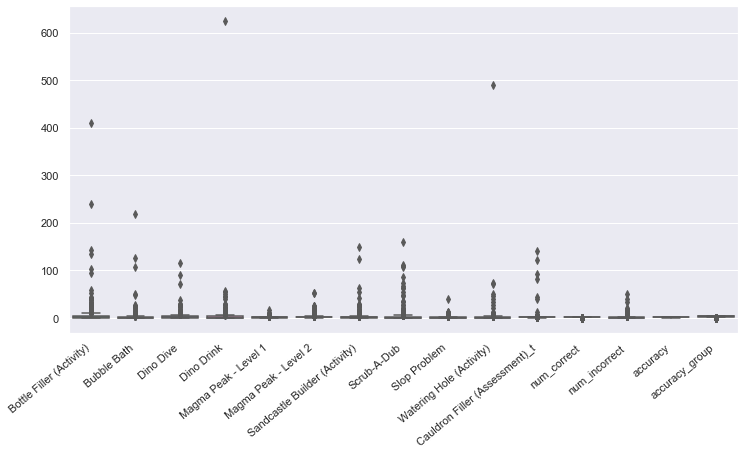

In [63]:
plt.figure(figsize=(12,6))
ax=sns.boxplot(data=result , orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right");

In [64]:
#removing rows , where the user has played a session more than 15 minutes
for i in result.columns:
    if (i!='installation_id'):
        result=result[result[i]<=15]
print(result.shape)            

(1835, 16)


In [65]:
result.describe()

,Bottle Filler (Activity),Bubble Bath,Dino Dive,Dino Drink,Magma Peak - Level 1,Magma Peak - Level 2,Sandcastle Builder (Activity),Scrub-A-Dub,Slop Problem,Watering Hole (Activity),Cauldron Filler (Assessment)_t,num_correct,num_incorrect,accuracy,accuracy_group
count,1835.000000,1835.000000,1835.000000,1835.000000,1835.000000,1835.000000,1835.000000,1835.000000,1835.000000,1835.000000,1835.000000,1835.000000,1835.000000,1835.000000,1835.000000
mean,2.613964,1.124809,1.542001,1.345585,1.035422,1.381471,0.906150,1.339603,0.622343,0.693623,0.696561,0.888828,0.762398,0.743197,2.321526
std,2.990083,1.820943,1.988130,1.926020,0.951007,1.402788,1.172473,2.101977,1.050856,0.995749,0.445761,0.314430,1.532349,0.367420,1.040693
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.070000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.470000,1.000000,0.000000,0.500000,2.000000
50%,2.060000,0.000000,0.540000,0.000000,1.000000,1.000000,0.740000,0.000000,0.000000,0.210000,0.590000,1.000000,0.000000,1.000000,3.000000
75%,3.850000,1.730000,2.670000,2.470000,1.000000,2.000000,1.310000,1.970000,1.000000,1.140000,0.780000,1.000000,1.000000,1.000000,3.000000
max,14.640000,13.480000,13.880000,14.630000,10.000000,12.000000,13.610000,14.625000,11.000000,10.790000,6.630000,1.000000,15.000000,1.000000,3.000000


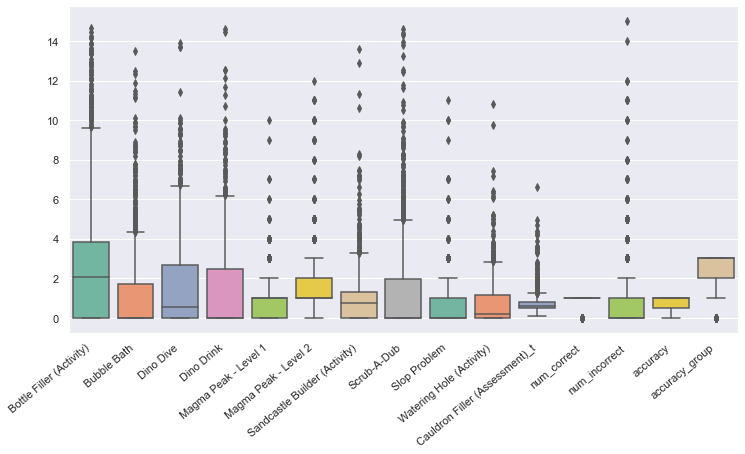

In [66]:
plt.figure(figsize=(12,6))
ax=sns.boxplot(data=result , orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right");

In [67]:
#save as csv file
result.loc[ :].to_csv('../data/magmapeak_final.csv',index=False)
